
<h1>Projeto 2 - "O Bife"</h1>

Marcelo Lisboa de Castro Reis e Stefano Fakhouri Moretti - 
1C

**Diagrama de Estoques e Fluxos:**

<img src="Estoques.png"/, width=400, height=300 style="float: center; margin: 0px 0px 10px 10px">  
Figura 1: Modelo de 1 estoques para a quantidade de  energia interna  de um bife


**Equação Diferencial:**

$\Large{\frac{dTb}{dt}=\frac{1}{m_b\cdot c_b} \cdot [\dot{Q}_{condBife} - \dot{Q}_{convB} - \dot{Q}_{rad_2}] }$



$ \dot{Q}_{condBife} = \dot{Q}_{fogo} - \dot{Q}_{convSup} - \dot{Q}_{rad_1}$

$ \dot{Q}_{convB} = h_{sb} \cdot A_b \cdot (Tb-Ta)$

$ \dot{Q}_{rad_2} = (A_b)\cdot e_{bife} \cdot \sigma \cdot Tb^4$


**Simplificações:**
- Bife será um sistema térmico
- Não há perda de energia pela superfície inferior
- Não há vento
- Temperatura da chapa será constantemente de 200°C
- Temperatura do bife será homogênea em todo o seu volume
- Desconsideraremos o óleo para fritar/cozinhar o bife


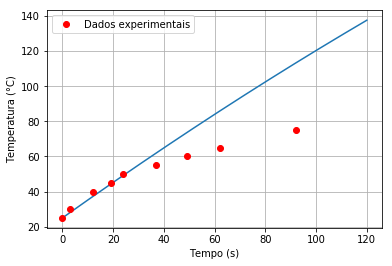

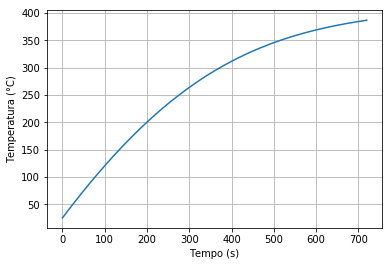

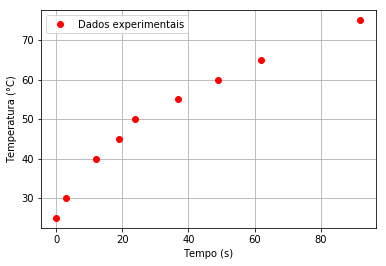

In [7]:
#Projeto 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

##PARÂMETROS##

Tp = 523.15 ##(*medir temperatura com termômetro Carlinhos) #temperatura panela #250°C
#mp = 1 ##(*aprox. 1kg) #massa panela
#cp = 460.547801 #calor especifico panela de ferro, em J/kg.K
Qf = 600 ##()#potencia fogo #W
hs = 20 #coef. de transferencia convectiva entre ar e panela, em W/m2.K (varia de 10 a 30)
#As = 0.045216 ##(*depende da panela) #área da superfície da panela em contato com o ar (sem o bife)
Ta = 298.15 ##(aprox. 25°C) #temperatura ambiente
#d =  0.004 ##(*3 a 4 mm) #espessura da parede da panela
Ap = 0.037366 ##(*aprox. 500 cm2) #área da parede da panela (área interna = área externa) - área bife
kp = 52 #condutividade térmica da panela de ferro, em W/mK
emissividade_panela = 0.95 #Strongly oxidized cast iron pan
sigma=5.6703e-8 # em Wm-2 K-2

#Tb = ##(*medir temperatura com termômetro) #temperatura bife
mb = 0.2 #massa bife, em kg
cb = 1340 ##(lombo: 1.47 kJ/(kg. K) ou Fraldinha: 1.34  kJ/(kg . K)) #calor especifico bife
hsb = 20 #(10-30 W/m2.K) #coef. de transferencia convectiva entre ar e bife
#Asb =  ##(*depende do bife) #área da superfície do bife em contato com o ar
Ab = 0.01413 ##(*depende do bife) #área bife
emissividade_bife = 0.98

#QconvSup = hs*Ap*(Tp-Ta)
#Qrad1 = (Ap)*emissividade_panela*sigma*Tp**4
#QcondBife = Qf - QconvSup - Qrad1

#print(QconvSup)
#print(Qrad1)
#print(QcondBife)

##EQUAÇÃO DIFERENCIAL##

def EqDiferenciais (listaSolucao, t):
    Tb = listaSolucao[0]
    QconvSup = hs*Ap*(Tp-Ta)
    #QcondBife = (Tp-Ta)/((d/(kp*Ap))+(1/(hs*Ap))) ##não é possivel medir a condução pela equação pois não há parede no meio
    Qrad1 = (Ap)*emissividade_panela*sigma*Tp**4
    QcondBife = Qf - QconvSup - Qrad1
    QconvB = hsb*Ab*(Tb-Ta)
    Qrad2 = (Ab)*emissividade_bife*sigma*Tb**4
    dTbdt = (QcondBife-QconvB-Qrad2)/(mb*cb)
    return dTbdt

delta_t = 1e-3

CI = [Ta]
T = np.arange(0,120,delta_t) #2 min
Tlongo = np.arange(0,720,delta_t) #12 min

solucaoAmbiente = odeint(EqDiferenciais, CI, T)
solucaoAmbiente2 = odeint(EqDiferenciais, CI, Tlongo)
ta_em_C_bife = [temp-273.15 for temp in solucaoAmbiente[:,0]]
ta_em_C_bife2 = [temp-273.15 for temp in solucaoAmbiente2[:,0]]

##EXPERIMENTAÇÃO##

dados_reais_tempo = [0,3,12,19,24,37,49,62,92]
dados_reais_temperatura = [25,30,40,45,50,55,60,65,75]

##GRÁFICOS##

#VALIDAÇÃO de certa forma QUANTITATIVA

plt.plot(T, ta_em_C_bife)
plt.plot(dados_reais_tempo, dados_reais_temperatura, 'ro',label="Dados experimentais")
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()

#VALIDAÇÃO QUALITATIVA

plt.plot(Tlongo, ta_em_C_bife2)
#plt.plot(dados_reais_tempo, dados_reais_temperatura, 'ro',label="Dados reais")
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
#plt.legend()
plt.show()

#plt.plot(T, ta_em_C_bife)
plt.plot(dados_reais_tempo, dados_reais_temperatura, 'ro',label="Dados experimentais")
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()

Será que a temperatura inicial da carne interfere no tempo que ela leva para cozinhar?

Partindo dessa questão, implementamos a mesma equação diferencial só que com cinco diferentes temperaturas iniciais do bife. Veja o resultado no gráfico abaixo.

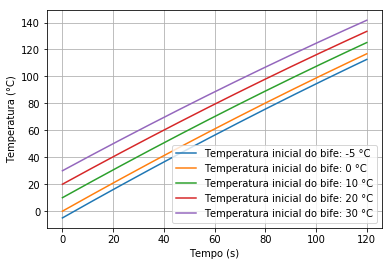

In [3]:
listaTempo = np.arange(0,120,delta_t) #2 min - deixa mais fácil de perceber as diferenças no cozimento.

listaTb = [268.15, 273.15,283.15,293.15, 303.15]

for Tib in listaTb:
    CI = [Tib]
    solucao = odeint(EqDiferenciais, CI, listaTempo)
    #temperatura_em_C = [temp-273.15 for temp in solucao[:,0]]
    temperatura_em_C_bife = [temp-273.15 for temp in solucao[:,0]]
    plt.plot(listaTempo, temperatura_em_C_bife, label='Temperatura inicial do bife: %.f °C' %(Tib-273.15))

plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()

A partir dos resultados obtidos no gráfico anterior resolvemos descobrir quanto tempo leva para um bife de 200g cozinhar (chegar aproximadamente à 75°C), estando no ponto, pronto para comer. Para isso, observamos o resultado da variação da temperatura inicial da carne.

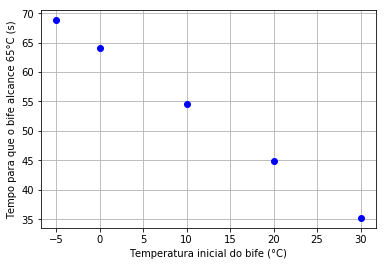

In [6]:
def Temperatura65graus(tempo, temperatura, valor):
    contador=100
    for i in range(1, len(temperatura)):
        if temperatura[i] >= valor and temperatura[i-1] <= valor:
            #encontramos
            contador=i
            break
    return contador #retorna o lugar que o valor é na lista temperatura

lisTemperatura65graus=[] #65°C seria ao ponto

for Tib in listaTb:
    CI = [Tib]
    solucao = odeint(EqDiferenciais, CI, listaTempo)
    temperatura_em_C_bife = [temp-273.15 for temp in solucao[:,0]]
    temp65 = Temperatura65graus(listaTempo, temperatura_em_C_bife, 65)
    lisTemperatura65graus.append(listaTempo[temp65])
    #print(temp65)
    
Tib_em_C = [temp-273.15 for temp in listaTb]

plt.plot(Tib_em_C, lisTemperatura65graus, 'bo')
plt.xlabel("Temperatura inicial do bife (°C)")
plt.ylabel("Tempo para que o bife alcance 65°C (s)")
plt.grid(True)  
plt.show()


## Futura iteração**

E como será que a potência também interfere nesse processo de cozimento do bife?

Agora, para uma mesma temperatura inicial do bife (vamos considerar a temperatura ambiente), variaríamos diferentes potências de fogo até que o filé de carne esteja cozido. 

